In [1]:
import math
import datasets
import IBM1 as ibm1
import debug_helpers
import convergence_criterion as cc
import persistence
import plots
import evaluate

# pretty print variabeles on line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def fname_ibm1(fname):
    return f'IBM1_output/{fname}'

# HACK: store converged models during the iteration run
AER_scores = {}
llhood_scores = {}
def save_selected_models(i, llhood, AER, prev_llhood, prev_AER, lprobs):
    mname = 'IBM1'
    debug_helpers.print_likelihood(i, [], llhood, AER)
    if prev_AER and (mname not in AER_scores) and cc.has_converged_AER(prev_AER, AER):
        persistence.save_ibm1_model(lprobs, fname_ibm1(f'params_AER_{i}.txt'))
        AER_scores[mname] = AER
    if prev_llhood and (mname not in llhood_scores) and cc.has_converged_LLhood(prev_llhood, llhood):
        persistence.save_ibm1_model(lprobs, fname_ibm1(f'params_llhood_{i}.txt'))
        llhood_scores[mname] = llhood

def run_em_with_initialization(
    s_t_pairs, val_sentence_pairs, reference_alignments):

    # EM
    (lprobs, llhoods, AERs) = ibm1.EM(
        s_t_pairs, 16,
        val_sentence_pairs, reference_alignments, 
        save_selected_models
    ) 
    
    # store AER and llhood scores in file
    persistence.save(AERs, fname_ibm1(f'AERs.txt'))
    persistence.save(llhoods, fname_ibm1(f'llhoods.txt'))

    # select models based on AER and llhood selection criterion
    selected_model_AER = fname_ibm1(cc.select_model_AER(AERs))
    selected_model_llhood = fname_ibm1(cc.select_model_LLhood(llhoods))
    print(f'model selected on AER:', selected_model_AER)
    print(f'model selected on LLhood:', selected_model_llhood)
        

In [3]:
#train model
(training_pairs, validation_pairs, test_pairs) = persistence.get_preprocessed_sentence_pairs()
reference_alignments = datasets.validation_alignments()    

# training_pairs, _, _ = datasets.example_data_word_order()
# validation_pairs = None
# reference_alignments = None    

AER_scores = {}
llhood_scores = {}

run_em_with_initialization(
    training_pairs, validation_pairs, reference_alignments)



iteration    log_likelihood    AER    time
0 -35670201.595 0.83286 09:02
1 -22993492.481 0.37311 09:04
2 -20118596.767 0.33365 09:05
3 -19236782.071 0.32760 09:07
4 -18934947.789 0.32632 09:09
5 -18799460.302 0.32727 09:10
6 -18727633.007 0.32919 09:13
7 -18685272.076 0.32919 09:15
8 -18658319.960 0.32887 09:16
9 -18640156.695 0.32696 09:18
10 -18627345.810 0.32184 09:20
11 -18617967.496 0.32184 09:22
12 -18610891.644 0.31660 09:24
13 -18605420.214 0.31757 09:26
14 -18601103.457 0.31726 09:27
15 -18597637.461 0.31823 09:29
model selected on AER: IBM1_output/5
model selected on LLhood: IBM1_output/9


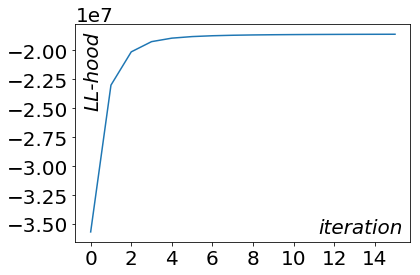

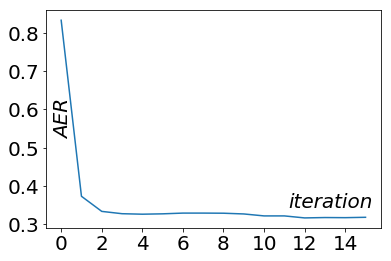

In [4]:
# plot AER and llhood scores vs iteration
llhoods = persistence.load(fname_ibm1(f'llhoods.txt'))
AERs = persistence.load(fname_ibm1('AERs.txt'))
plots.figure_log_likelihood(llhoods, fname_ibm1('IBM1_LL.png'))
plots.figure_AER(AERs, fname_ibm1('IBM1_AER.png'))


In [7]:
def evaluate_IBM1_model(test_sentence_pairs, path_to_model, model_name):
    lprobs = persistence.load_ibm1_model(path_to_model)
    alignments = ibm1.align(lprobs, test_sentence_pairs)
    evaluate.evaluate_alignments_testset(model_name, alignments)    

model_name_AER = 'IBM1_AER'
path_to_AER_model = fname_ibm1('params_AER_5.txt')
evaluate_IBM1_model(test_pairs, path_to_AER_model, 'IBM1_AER')

model_name_LL = 'IBM1_LL'
path_to_LL_model = fname_ibm1('params_llhood_9.txt')
evaluate_IBM1_model(test_pairs, path_to_LL_model, 'IBM1_LL')

File generated: IBM1_AER.nonullalign.
Look in terminal to check if --IBM1_AER.nonullalign-- is in NAACL format...
Look in terminal to see AER scores...


KeyError: '2'

In [24]:
model_name_LL = 'IBM1_LL'
path_to_LL_model = fname_ibm1('params_llhood_9.txt')
evaluate_IBM1_model(test_pairs, path_to_LL_model, 'IBM1_LL')

File generated: IBM1_LL.nonullalign.
Look in terminal to check if --IBM1_LL.nonullalign-- is in NAACL format...
Look in terminal to see AER scores...
